# Datenanalyse mit KI & Machine Learning
## Cross Validation und Gridsearch


In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Bestimmung des Geschlechts

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
penguins.dropna(inplace=True)

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
X = penguins.select_dtypes('number')
y = penguins['sex']

#### Aufsplitten der Daten in drei Datensätze (Training, Validierung und Test) reduziert bei kleineren Datensätzen die Stärke unses Modells
#### Wie verhindern wir das?

## Crossvalidation: Mit Folds keine Daten verlieren

In [52]:
# Aufsplitten in Trainings- und Testdatensatz (keine Validierungsdaten!)
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42,
													stratify=y)

In [8]:
# Parameter stratify sorgt dafür, dass in jedem Teil der Daten die Verhältnisse von y gewahrt werden.
# Das hier sind die Geschlechterverhältnisse in unseren Daten:
y.value_counts(normalize=True)

sex
Male      0.504505
Female    0.495495
Name: proportion, dtype: float64

In [9]:
# Überprüfen:
y_train.value_counts(normalize=True)

sex
Male      0.503759
Female    0.496241
Name: proportion, dtype: float64

In [10]:
# Überprüfen:
y_test.value_counts(normalize=True)

sex
Male      0.507463
Female    0.492537
Name: proportion, dtype: float64

In [11]:
# Erzeugen einer Instanz von KNN:
knn1 = KNeighborsClassifier()

In [12]:
# Mit Parameter cv steuert man die Anzahl der Folds (Teile, in die die Daten geteilt werden):
knn_cv = cross_val_score(
	knn1,
	X_train,
	y_train,
	cv=5,
	scoring='accuracy',
	verbose=3,
)

[CV] END ................................ score: (test=0.815) total time=   0.0s
[CV] END ................................ score: (test=0.811) total time=   0.0s
[CV] END ................................ score: (test=0.736) total time=   0.0s
[CV] END ................................ score: (test=0.736) total time=   0.0s
[CV] END ................................ score: (test=0.830) total time=   0.0s


In [13]:
knn_cv

array([0.81481481, 0.81132075, 0.73584906, 0.73584906, 0.83018868])

In [14]:
knn_cv.mean()

np.float64(0.7856044723969253)

## Auf dem Weg zum Gridsearch

In [15]:
# Training des Modells mit verschiedenen k's in der Schleife und Vergleich der Fehlerraten UND CV:

error_rates = []

for i in range(1, 30):
	knn = KNeighborsClassifier(n_neighbors=i)
	knn_cv = cross_val_score(knn, X_train, y_train,
							 cv=5, scoring='accuracy', verbose=0)
	error_rate = 1 - knn_cv.mean()
	error_rates.append(error_rate)

In [16]:
error_rates

[np.float64(0.21802935010482183),
 np.float64(0.26331236897274635),
 np.float64(0.23710691823899377),
 np.float64(0.2445842068483579),
 np.float64(0.21439552760307468),
 np.float64(0.20307477288609355),
 np.float64(0.22571628232005592),
 np.float64(0.2294898672257163),
 np.float64(0.22201257861635226),
 np.float64(0.21823899371069166),
 np.float64(0.20307477288609355),
 np.float64(0.2144654088050315),
 np.float64(0.203214535290007),
 np.float64(0.19944095038434662),
 np.float64(0.22208245981830887),
 np.float64(0.22585604472396914),
 np.float64(0.2294898672257163),
 np.float64(0.2294898672257164),
 np.float64(0.2294898672257164),
 np.float64(0.23326345213137678),
 np.float64(0.23703703703703705),
 np.float64(0.23703703703703705),
 np.float64(0.24081062194269742),
 np.float64(0.24821802935010484),
 np.float64(0.2406708595387841),
 np.float64(0.23312368972746333),
 np.float64(0.2256464011180992),
 np.float64(0.22941998602375968),
 np.float64(0.2256464011180993)]

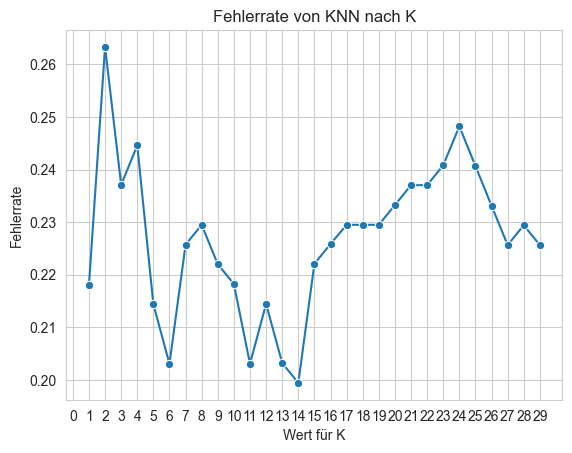

In [17]:
sns.lineplot(x=range(1, 30), y=error_rates, marker='o')
plt.xticks(np.arange(30))
plt.xlabel('Wert für K')
plt.ylabel('Fehlerrate')
plt.title('Fehlerrate von KNN nach K')
plt.show()

In [18]:
min_error = min(error_rates)
min_error

np.float64(0.19944095038434662)

In [19]:
print('Optimaler k-Wert ist:', error_rates.index(min_error) + 1)

Optimaler k-Wert ist: 14


# Hyperparameter, die wir verstellen werden:

### 1. Abstand
#### Euklidischer Abstand: Abstände sind Wurzel der quadrierten Abstände von x und y:
$$ euklidischerabstand = \sqrt{(x_1-x_0)^2+(y_1-y_0)^2} $$
#### Manhattanabstand: Betrag von Differenz zweier Punkte auf X-Achse + und der Differenz zweier Punkte auf Y-Achse:
$$ manhattanabstand = |x_1-x_0|+|y_1-y_0| $$
#### Es gibt noch weitere Metriken bei KNN. 

### 2. Gewichtung
#### uniform: Punkte werden einheitlich gewichtet.
#### distance: Je weiter ein Punkt weg ist, desto schwächer fließt er ein.

In [20]:
knn2 = KNeighborsClassifier()
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
# knn_range = np.arange(3, 8)
# knn_range

In [39]:
# Definition der Parameter, deren Kombination wir untersuchen wollen:
grid_params = {'n_neighbors': [3, 4, 5, 6, 7, 8],
			   'weights': ['uniform', 'distance'],
			   'metric': ['euclidean', 'manhattan']}

In [40]:
grid = GridSearchCV(knn2, grid_params, verbose=1, cv=5)

In [41]:
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [42]:
# Bestes Resultat aus 20 Durchläufen:
grid_results.best_score_

np.float64(0.8043326345213139)

In [43]:
# Zum Vergleich Wert von weiter oben:
1 - min_error

np.float64(0.8005590496156534)

In [44]:
# Beste Parameter anzeigen lassen:
grid_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [45]:
knn_final = KNeighborsClassifier(n_neighbors=5,
								 weights='distance',
								 metric='manhattan',
								 )

In [46]:
# Oder mit Dictionary unpacking: **kwargs
best_params = grid_results.best_params_
knn_final = KNeighborsClassifier(**best_params)

In [47]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [48]:
knn_final.score(X_test, y_test)

0.7611940298507462

In [53]:
# Modell speichern:
with open("penguin_sex_model.pkl", "wb") as f:
	pickle.dump(knn_final, f)

In [54]:
# Modell wieder laden:
loaded_model = pickle.load(open('penguin_sex_model.pkl', 'rb'))

In [55]:
# ...und nutzen:
loaded_model.predict(X_test)

array(['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male'], dtype=object)

In [56]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
279,50.4,15.3,224.0,5550.0
44,37.0,16.9,185.0,3000.0
261,49.6,16.0,225.0,5700.0
180,46.4,17.8,191.0,3700.0
213,46.8,16.5,189.0,3650.0
...,...,...,...,...
264,50.5,15.9,222.0,5550.0
263,49.6,15.0,216.0,4750.0
2,40.3,18.0,195.0,3250.0
238,46.2,14.5,209.0,4800.0


# Übungsaufgabe

### Lade den Datensatz house_prices.csv und erstelle ein Modell, das die Lage der Gegenden voraussagt (Bay, Near Bay,...). Nutze Hyperparameter-Optimierung, um dein Modell zu optimieren!

In [60]:
# Load Data
data = pd.read_csv("house_prices.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [61]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [62]:
data.dropna(inplace=True)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64